Topic:        Challenge Set 3  
Subject:      Pandas  
Date:         16 Jan 2018  
Name:         Audrey Baker  
Worked with:  

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt

In [106]:
movies = pd.read_csv('~/metis/challenge_draft/2013_movies.csv')

In [107]:
movies.head()
movies.sort_index(inplace = True)
movies.tail()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
95,Rush,38000000.0,26947624,Ron Howard,R,123,2013-09-20 00:00:00
96,The Host,40000000.0,26627201,Andrew Niccol,PG-13,125,2013-03-29 00:00:00
97,The World's End,20000000.0,26004851,Edgar Wright,R,109,2013-08-23 00:00:00
98,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,2013-03-01 00:00:00
99,Her,23000000.0,25568251,Spike Jonze,R,120,2013-12-18 00:00:00


In [115]:
movies['ReleaseDate'] = pd.to_datetime(movies['ReleaseDate'], format = '%Y-%m-%d')

**Challenge 1**

Plot domestic total gross over time.

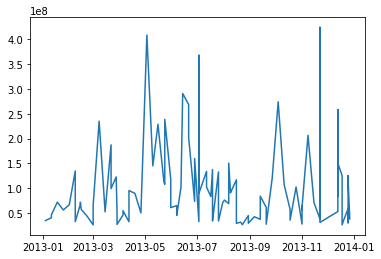

In [116]:
movies.sort_values('ReleaseDate', inplace = True)
plt.plot(movies['ReleaseDate'], movies['DomesticTotalGross']);

**Challenge 2**

Plot runtime vs. domestic total gross.

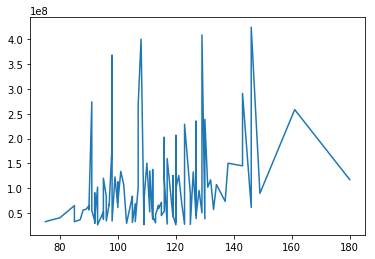

In [117]:
movies.sort_values('Runtime', inplace = True)
plt.plot(movies['Runtime'], movies['DomesticTotalGross']);

**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [118]:
movies\
    .groupby(movies['Rating'])\
    ['Runtime', 'DomesticTotalGross'].mean()

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

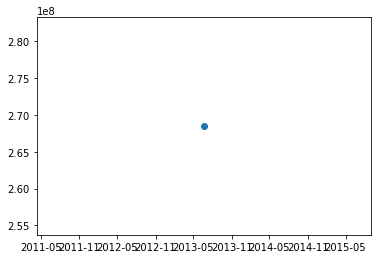

In [120]:
plt.plot_date(movies[movies['Rating']=='G']['ReleaseDate'], movies[movies['Rating']=='G']['DomesticTotalGross']);

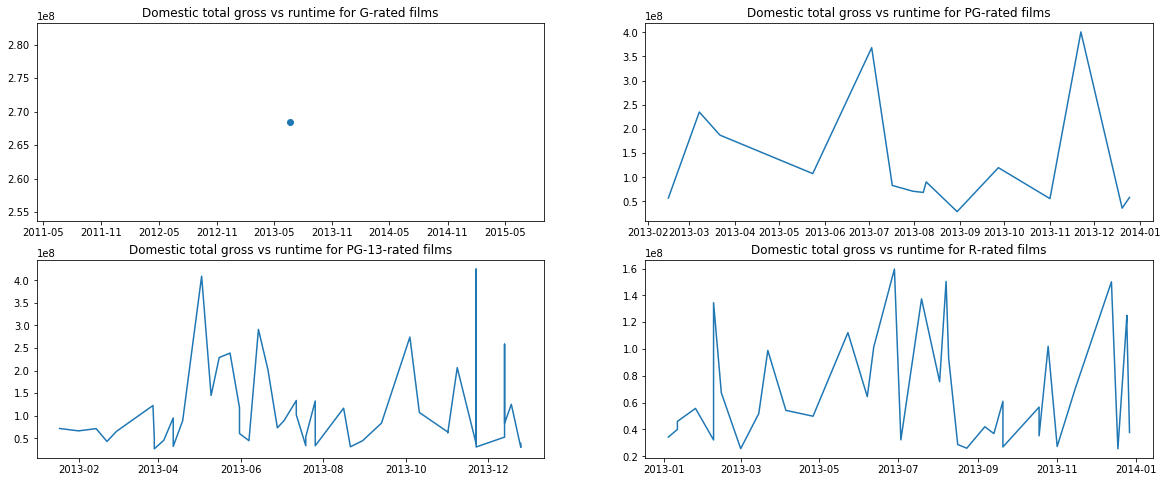

In [123]:
movies.sort_values('ReleaseDate', inplace = True)
fig, ax = plt.subplots(2, 2, figsize=(20, 8))

ax[0,0].plot_date(movies[movies['Rating']=='G']['ReleaseDate'], movies[movies['Rating']=='G']['DomesticTotalGross'])
ax[0,0].set_title('Domestic total gross vs runtime for G-rated films')

ax[0,1].plot(movies[movies['Rating']=='PG']['ReleaseDate'], movies[movies['Rating']=='PG']['DomesticTotalGross'])
ax[0,1].set_title('Domestic total gross vs runtime for PG-rated films')

ax[1,0].plot(movies[movies['Rating']=='PG-13']['ReleaseDate'], movies[movies['Rating']=='PG-13']['DomesticTotalGross'])
ax[1,0].set_title('Domestic total gross vs runtime for PG-13-rated films')

ax[1,1].plot(movies[movies['Rating']=='R']['ReleaseDate'], movies[movies['Rating']=='R']['DomesticTotalGross'])
ax[1,1].set_title('Domestic total gross vs runtime for R-rated films');

**Challenge 5**

What director in your dataset has the highest gross per movie?

In [124]:
director = movies\
            .groupby(['Director'], as_index=False)\
            .DomesticTotalGross.mean()
director.rename(columns = {'DomesticTotalGross':'DirectorAverageGross'}, inplace = True)

movies_director = pd.merge(movies, director, on = 'Director', how = 'left')

print(movies_director.sort_values('DirectorAverageGross', ascending = False).iloc[0,3])



Francis Lawrence


**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."

In [135]:
movies['ReleaseMonth'] = movies['ReleaseDate'].dt.month

In [173]:
monthly = movies.groupby(['ReleaseMonth']).DomesticTotalGross.mean()
monthly = pd.DataFrame(monthly)
monthly['SD_gross'] = movies.groupby(['ReleaseMonth']).DomesticTotalGross.std()
monthly['N'] = movies.groupby(['ReleaseMonth']).DomesticTotalGross.count()
monthly['SE'] = monthly['SD_gross']/(monthly['N']**.5)
monthly.reset_index(inplace = True)
monthly.head()
#print(sqrt_count_gross.head())
#mean_gress['SE'] = movies['SD'].apply
movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 83 to 78
Data columns (total 9 columns):
Title                 100 non-null object
Budget                89 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null datetime64[ns]
ReleaseMonth          100 non-null int64
ReleaseYear           100 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 7.8+ KB


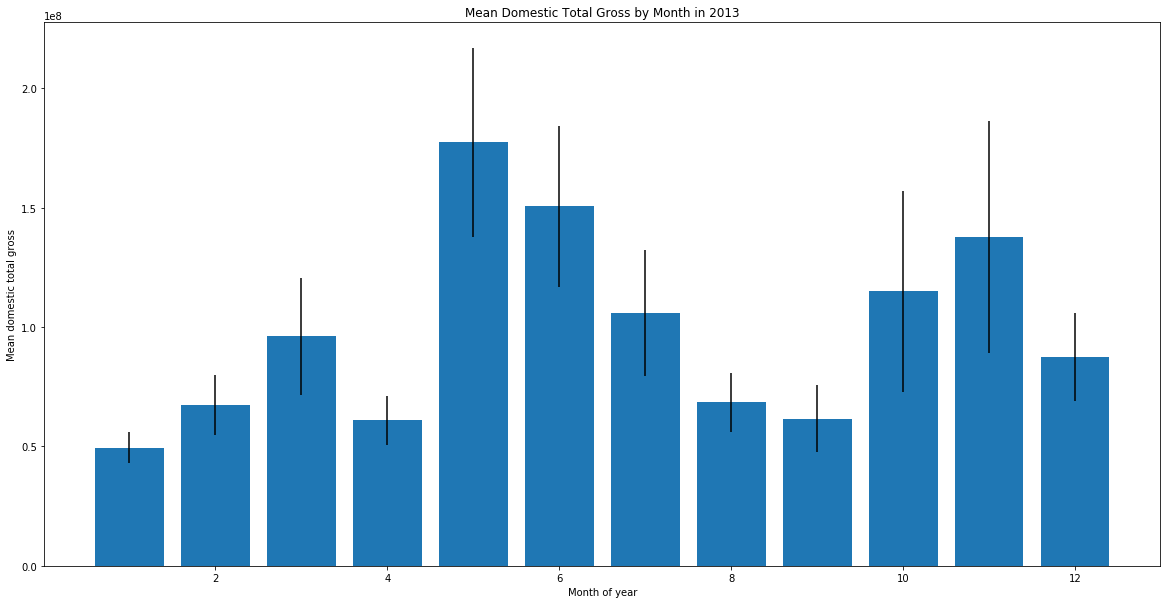

In [172]:
plt.figure(figsize=(20,10))
plt.xlabel('Month of year')
plt.ylabel('Mean domestic total gross')
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.bar(monthly['ReleaseMonth'],monthly['DomesticTotalGross'], yerr = monthly.SE);